Dieses Skript verwendet zum ersten Mal die Funktionalität, dass der IoU Score für die Vorhersagen ausgerechnet wird. Dadurch erhält man bessere Vergleichbarkeit mit den Ergebnissen von Aymane.

Als erstes Beispiel wird das Modell, bei dem zum ersten Mal `class_weight` per Hand gesetzt wurde, um die Unbalanciertheit der Klassen zu bekämpfen, gesetzt wurde.

In [1]:
import joblib
from utils.training import predict_random_forest
from utils.evaluation import get_iou_for_set
import numpy as np
import matplotlib.pyplot as plt

feature_file = "./features/features.hdf5"
data_split_file = "./data_split.yaml"
features = ['mean', 'variance', 'std', 'ptp_amp', 'skewness', 'kurtosis', 'quantile', 'pow_freq_bands', 'hurst_exp', 'decorr_time']
random_state = 42
overlap_treshold_values = np.linspace(0, 1, num = 21)

precision_values_val = []
recall_values_val = []
f1_values_val = []

precision_values_train = []
recall_values_train = []
f1_values_train = []

clf = joblib.load('models/14-11-25 11-35-39.joblib')

_, y_pred_val = predict_random_forest(clf, feature_file, features, data_split_file, 'val')
_, y_pred_train = predict_random_forest(clf, feature_file, features, data_split_file, 'train')

for overlap_treshold in overlap_treshold_values:
    precision_val, recall_val, f1_val = get_iou_for_set(overlap_treshold, y_pred_val, data_split_file, 'val', feature_file)
    precision_train, recall_train, f1_train = get_iou_for_set(overlap_treshold, y_pred_train, data_split_file, 'train', feature_file)

    precision_values_val.append(precision_val)
    recall_values_val.append(recall_val)
    f1_values_val.append(f1_val)

    precision_values_train.append(precision_train)
    recall_values_train.append(recall_train)
    f1_values_train.append(f1_train)

Extracting features and labels for sessions: 100%|██████████| 268/268 [00:00<00:00, 282.56it/s]
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.4s remaining:   21.3s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.7s finished
Extracting features and labels for sessions: 100%|██████████| 268/268 [00:03<00:00, 86.31it/s] 
[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    1.5s remaining:  1.3min
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    2.4s finished


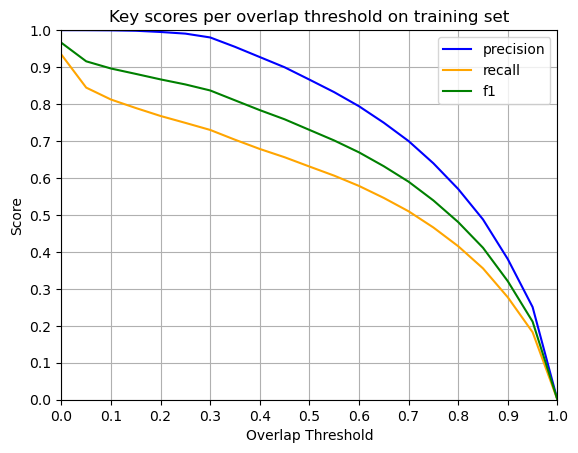

In [2]:
ticks = np.linspace(0, 1, num=11)

plt.xticks(ticks)
plt.yticks(ticks)

plt.plot(overlap_treshold_values, precision_values_train, label='precision', color='blue')
plt.plot(overlap_treshold_values, recall_values_train, label='recall', color='orange')
plt.plot(overlap_treshold_values, f1_values_train, label='f1', color='green')

plt.xlabel('Overlap Threshold')
plt.ylabel('Score')
plt.title('Key scores per overlap threshold on training set')
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig('output/exp_03_04_iou_f1_train.svg')
plt.show()

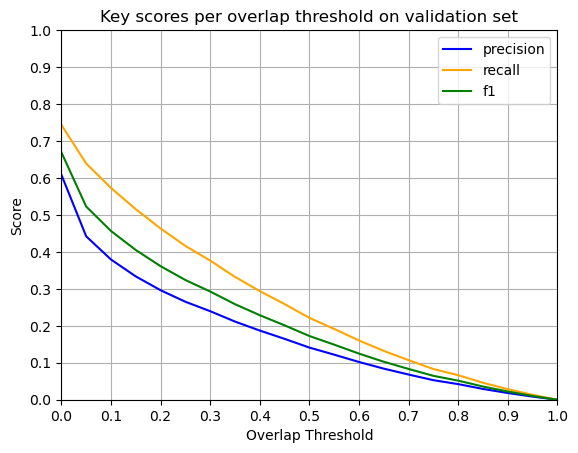

In [3]:
ticks = np.linspace(0, 1, num=11)

plt.xticks(ticks)
plt.yticks(ticks)

plt.plot(overlap_treshold_values, precision_values_val, label='precision', color='blue')
plt.plot(overlap_treshold_values, recall_values_val, label='recall', color='orange')
plt.plot(overlap_treshold_values, f1_values_val, label='f1', color='green')

plt.xlabel('Overlap Threshold')
plt.ylabel('Score')
plt.title('Key scores per overlap threshold on validation set')
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig('output/exp_03_04_iou_f1_val.svg')
plt.show()